### **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv


### Import Dataset

In [2]:
data = pd.read_csv('../input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')

### Now Exploring the dataset

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
print("Length of Data is: ", len(data.index))

Length of Data is:  614


In [6]:
print("Null Values in a Data: ")
data.isnull().any()

Null Values in a Data: 


Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [7]:
data.groupby('Gender').count()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,,,,,,,,,,,,
Female,112,111,109,112,104,112,112,109,109,101,112,112
Male,489,487,477,489,465,489,489,470,478,451,489,489


So here we can see Gender Male took the more loan than Female.

In [8]:
data.groupby('Married')['Loan_ID'].count()

Married
No     213
Yes    398
Name: Loan_ID, dtype: int64

In [9]:
data.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f02c8b15e80>,
      dtype=object)

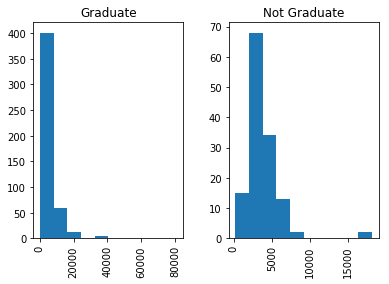

In [10]:
data.hist(column='ApplicantIncome', by='Education')

Here we can see Graduate People are highest applicant for the loan where the people who didn't graduate have less application for the loans.

In [11]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# We can also do this with apply method
data.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
data.shape # to check number of columns

(614, 13)

In [14]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

So we can see there are many categorical features

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Mostly columns are objects(string)

In [16]:
data.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [17]:
# Convert Object to Category
catList = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
for cat in catList:
    data[cat] = data[cat].astype('category')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null category
Married              611 non-null category
Dependents           599 non-null object
Education            614 non-null category
Self_Employed        582 non-null category
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null category
Property_Area        614 non-null category
Loan_Status          614 non-null category
dtypes: category(7), float64(3), int64(1), object(2)
memory usage: 33.8+ KB


There are two options for us:
1) Drop the missing values row
2) Fill the missinng values row with forward fill
we are going with ffill method

In [19]:
fillList = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for fill in fillList:
    data[fill].fillna(method='ffill', inplace=True)

In [20]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Here there are two numeric columns left with the NaN values so we have to look should we fill it with median, mode or mean

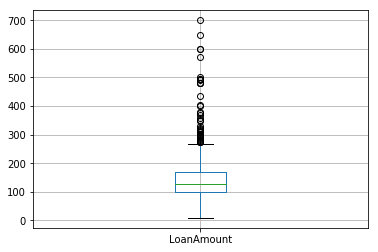

In [21]:
data.boxplot(column='LoanAmount')
plt.show()

It have lot of outliers so it is better to use median

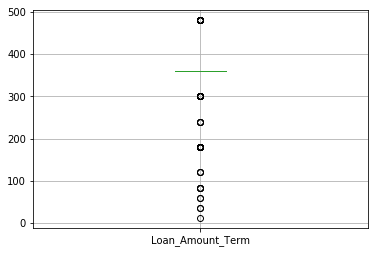

In [22]:
data.boxplot(column='Loan_Amount_Term')
plt.show()

In [23]:
medianList = ['LoanAmount', 'Loan_Amount_Term']
for med in medianList:
    data[med].fillna(data[med].median(), inplace=True)

In [24]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
# For visualize the data
import seaborn as sns
from matplotlib import pyplot as plt

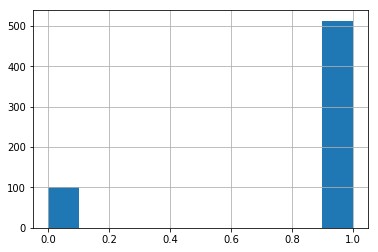

In [26]:
data['Credit_History'].hist()
plt.show()

Mostly people have a good credit history.. so now we can see if they are able to have a loan or not

In [27]:
data.groupby('Credit_History')['Loan_Status'].count()

Credit_History
0.0    101
1.0    513
Name: Loan_Status, dtype: int64

In [28]:
data.groupby('Loan_Status')['Credit_History'].count()

Loan_Status
N    192
Y    422
Name: Credit_History, dtype: int64

So 385 people got the loan out of 475 people who have a good history while there is a chance that people with bad credit history can also have a loan

In [29]:
data.groupby(['Loan_Status','Gender']).sum()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
Loan_Status Gender                                                   
N           Female           151380       62263.000000      4761.0   
            Male             894267      298276.000000     24018.0   
Y           Female           397242       61834.000000      9897.0   
            Male            1874835      573071.919989     50816.0   

                    Loan_Amount_Term  
Loan_Status Gender                    
N           Female           12996.0  
            Male             53160.0  
Y           Female           27204.0  
            Male            116880.0

In [30]:
data.groupby(['Loan_Status', 'Education']).sum()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
Loan_Status Education                                                      
N           Graduate               856032      295544.000000     22394.0   
            Not Graduate           189615       64995.000000      6385.0   
Y           Graduate              1955536      528843.919989     51164.0   
            Not Graduate           316541      106062.000000      9549.0   

                          Loan_Amount_Term  
Loan_Status Education                       
N           Graduate               49080.0  
            Not Graduate           17076.0  
Y           Graduate              116484.0  
            Not Graduate           27600.0

In [31]:
data.groupby(['Loan_Status', 'Education', 'Gender']).sum()

ApplicantIncome  CoapplicantIncome  \
Loan_Status Education    Gender                                       
N           Graduate     Female           132808       59026.000000   
                         Male             723224      236518.000000   
            Not Graduate Female            18572        3237.000000   
                         Male             171043       61758.000000   
Y           Graduate     Female           323220       54245.000000   
                         Male            1632316      474598.919989   
            Not Graduate Female            74022        7589.000000   
                         Male             242519       98473.000000   

                                 LoanAmount  Loan_Amount_Term  
Loan_Status Education    Gender                                
N           Graduate     Female      4137.0           10836.0  
                         Male       18257.0           38244.0  
            Not Graduate Female       624.0            2160.0  
                         Male        5761.0           14916.0  
Y           Graduate     Female      8270.0           22164.0  
                         Male       42894.0           94320.0  
            Not Graduate Female      1627.0            5040.0  
                         Male        7922.0           22560.0

In [32]:
data.Credit_History.unique()

[1.0, 0.0]
Categories (2, float64): [1.0, 0.0]

In [33]:
greaterMeanIncome = data['ApplicantIncome'] > data.ApplicantIncome.mean() # because here we are choosing the avg Income of the applicant
isGraduate = (data.Education == 'Graduate')
isMarried = (data.Married == 'No')
loanStatus = (data.Loan_Status == 'Y')
data[(isMarried) & (isGraduate) & (greaterMeanIncome) & (loanStatus)]['Self_Employed'].value_counts()

No     18
Yes    10
Name: Self_Employed, dtype: int64

So here we can see that there are less chance to get loan if the person is Graduated, Unmarried, have Average Income

In [34]:
greaterMeanIncome = data['ApplicantIncome'] > data.ApplicantIncome.mean() # because here we are choosing the avg Income of the applicant
isGraduate = (data.Education != 'Graduate')
isMarried = (data.Married != 'No')
loanStatus = (data.Loan_Status == 'Y')
data[(isMarried) & (isGraduate) & (greaterMeanIncome) & (loanStatus)]['Self_Employed'].value_counts()

Yes    3
No     2
Name: Self_Employed, dtype: int64

See the difference that a person which is not graduated and unmarried have a better chance to get loan

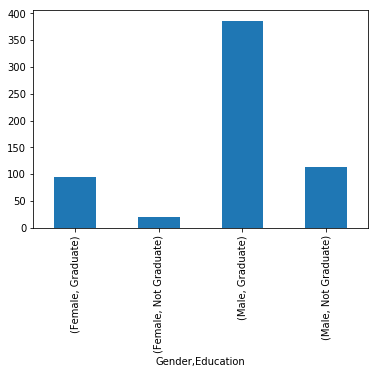

In [35]:
data.groupby(['Gender', 'Education'])['Loan_Status'].count().plot(kind='bar')

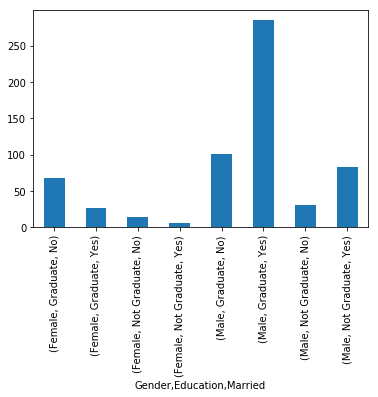

In [36]:
data.groupby(['Gender', 'Education', 'Married'])['Loan_Status'].count().plot(kind='bar')

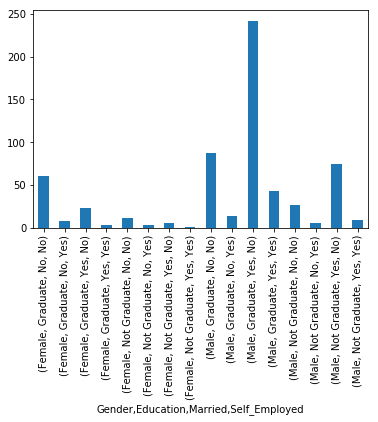

In [37]:
data.groupby(['Gender', 'Education', 'Married', 'Self_Employed'])['Loan_Status'].count().plot(kind='bar')

Here if a person is male, graduated, married, and not a self employed so that person have a higher chance to have a Yes in a Loan Status

In [38]:
# map Loan Status Y=1 , N=0 
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0})
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Married'] = data['Married'].map({'Yes': 1, 'No': 0})
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Property_Area'] = data['Property_Area'].map({'Urban':1,'Rural':2,'Semiurban':3})
data['Self_Employed'] = data['Self_Employed'].map({'Yes': 1, 'No': 0})
# for a fast computation

In [39]:
# we can also change categorical values into one hot encoding through dummies which pd.get_dummies then concatenate
# but we are going to do here

In [40]:
data.set_index('Loan_ID', inplace=True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


### Now Breaking into X and y

In [41]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [42]:
print("X Shape", X.shape)
print("Y Shape", y.shape)
y = y.astype('int64')

X Shape (614, 11)
Y Shape (614,)


In [43]:
data.iloc[:, :-1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 11 columns):
Gender               614 non-null category
Married              614 non-null category
Dependents           614 non-null object
Education            614 non-null category
Self_Employed        614 non-null category
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null category
Property_Area        614 non-null category
dtypes: category(6), float64(3), int64(1), object(1)
memory usage: 32.9+ KB


In [44]:
X = pd.DataFrame(X)

In [45]:
X.columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [46]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0,128,360,1,1
1,1,1,1,1,0,4583,1508,128,360,1,2
2,1,1,0,1,1,3000,0,66,360,1,1
3,1,1,0,0,0,2583,2358,120,360,1,1
4,1,0,0,1,0,6000,0,141,360,1,1


### Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Property_Area']] = scaler.fit_transform(X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Property_Area']])

In [48]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,0.0729908,-0.554487,-0.211241,0.273231,1,-1.2503
1,1,1,1,1,0,-0.134412,-0.0387315,-0.211241,0.273231,1,-0.0600919
2,1,1,0,1,1,-0.393747,-0.554487,-0.948996,0.273231,1,-1.2503
3,1,1,0,0,0,-0.462062,0.25198,-0.306435,0.273231,1,-1.2503
4,1,0,0,1,0,0.0977284,-0.554487,-0.0565506,0.273231,1,-1.2503


### One Hot Encoding

In [49]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X = ohe.fit_transform(X)

#### Split Data

In [50]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
print("Train X Shape", train_X.shape)
print("Test X Shape", test_X.shape)

Train X Shape (429, 1022)
Test X Shape (185, 1022)


### Metrics

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score

### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier() # with no parameters define
dtc.fit(train_X, train_y)
pred_y = dtc.predict(test_X)
print("Score of Decision Tree: ", dtc.score(test_X, test_y))
print("Accuracy of Decision Tree: ", accuracy_score(test_y, pred_y))
print("Confusion Matrix of Decision Tree: \n", confusion_matrix(test_y, pred_y))

Score of Decision Tree:  0.745945945945946
Accuracy of Decision Tree:  0.745945945945946
Confusion Matrix of Decision Tree: 
 [[ 34  31]
 [ 16 104]]


### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(train_X, train_y)
pred_y = rfc.predict(test_X)
print("Score of Random Forest: ", rfc.score(test_X, test_y))
print("Accuracy of Random Forest: ", accuracy_score(test_y, pred_y))
print("Confusion Matrix of Random Forest: \n", confusion_matrix(test_y, pred_y))

Score of Random Forest:  0.7837837837837838
Accuracy of Random Forest:  0.7837837837837838
Confusion Matrix of Random Forest: 
 [[ 30  35]
 [  5 115]]


### Stochastic Gradient Descent

In [55]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(train_X, train_y)
pred_y = sgd.predict(test_X)
print("Score of SGD: ", sgd.score(test_X, test_y))
print("Accuracy of SGD: ", accuracy_score(test_y, pred_y))
print("Confusion Matrix of SGD: \n", confusion_matrix(test_y, pred_y))

Score of SGD:  0.7405405405405405
Accuracy of SGD:  0.7405405405405405
Confusion Matrix of SGD: 
 [[ 30  35]
 [ 13 107]]
